
Name : Dwi Fitria Astari Lubis

SALES PREDICTION USING PYTHON



In [4]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\CODSOFT\\CODSOFT\\7. Sales Prediction by Python\\advertising.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


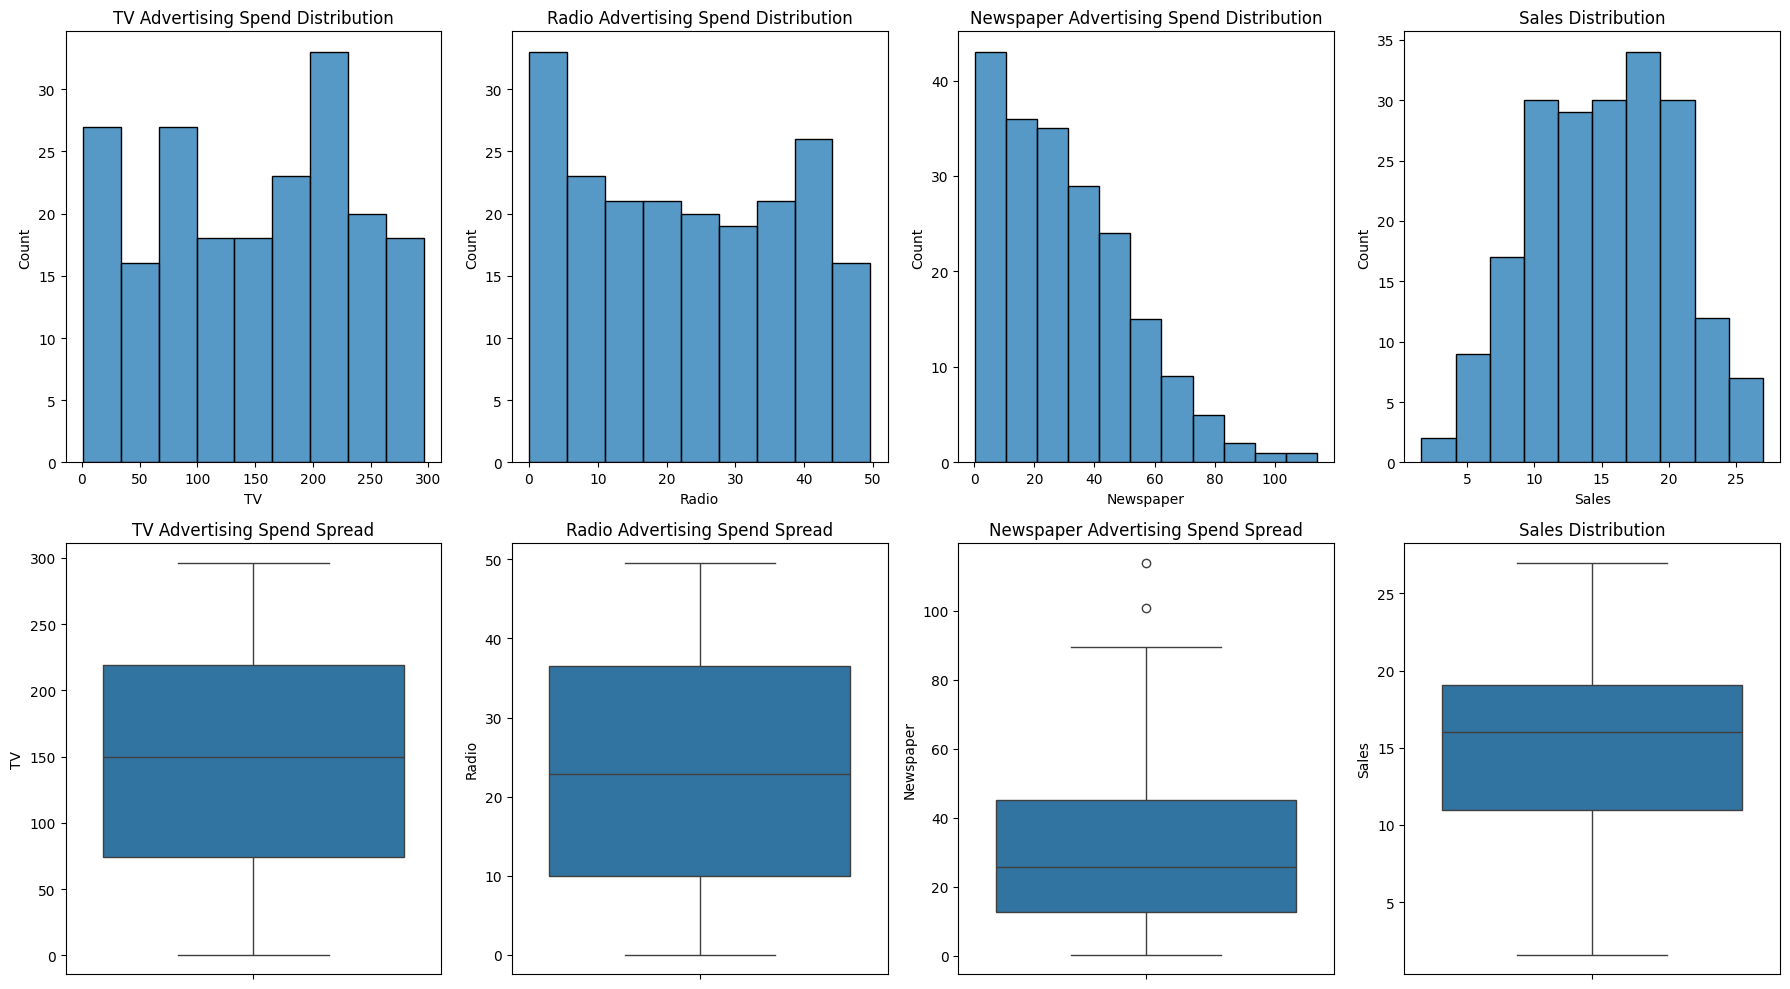

In [9]:
data = pd.DataFrame(df)
# Create a figure with 6 subplots arranged in 2 rows and 3 columns
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Create histograms for each variable
sns.histplot(data=df, x='TV', ax=axes[0, 0])
axes[0, 0].set_title('TV Advertising Spend Distribution')
sns.histplot(data=df, x='Radio', ax=axes[0, 1])
axes[0, 1].set_title('Radio Advertising Spend Distribution')
sns.histplot(data=df, x='Newspaper', ax=axes[0, 2])
axes[0, 2].set_title('Newspaper Advertising Spend Distribution')
sns.histplot(data=df, x='Sales', ax=axes[0, 3])
axes[0, 3].set_title('Sales Distribution')

# Create box plots for each variable
sns.boxplot(data=df, y='TV', ax=axes[1, 0])
axes[1, 0].set_title('TV Advertising Spend Spread')
sns.boxplot(data=df, y='Radio', ax=axes[1, 1])
axes[1, 1].set_title('Radio Advertising Spend Spread')
sns.boxplot(data=df, y='Newspaper', ax=axes[1, 2])
axes[1, 2].set_title('Newspaper Advertising Spend Spread')
sns.boxplot(data=df, y='Sales', ax=axes[1, 3])
axes[1, 3].set_title('Sales Distribution')
# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
# Apply square root transformation to 'Radio' and 'Newspaper' columns
df['Newspaper_sqrt'] = np.sqrt(df['Newspaper'])

# Display the first few rows to verify the transformation
df[['Newspaper', 'Newspaper_sqrt']].head()

,Newspaper,Newspaper_sqrt
0,69.2,8.318654
1,45.1,6.715653
2,69.3,8.324662
3,58.5,7.648529
4,58.4,7.641989


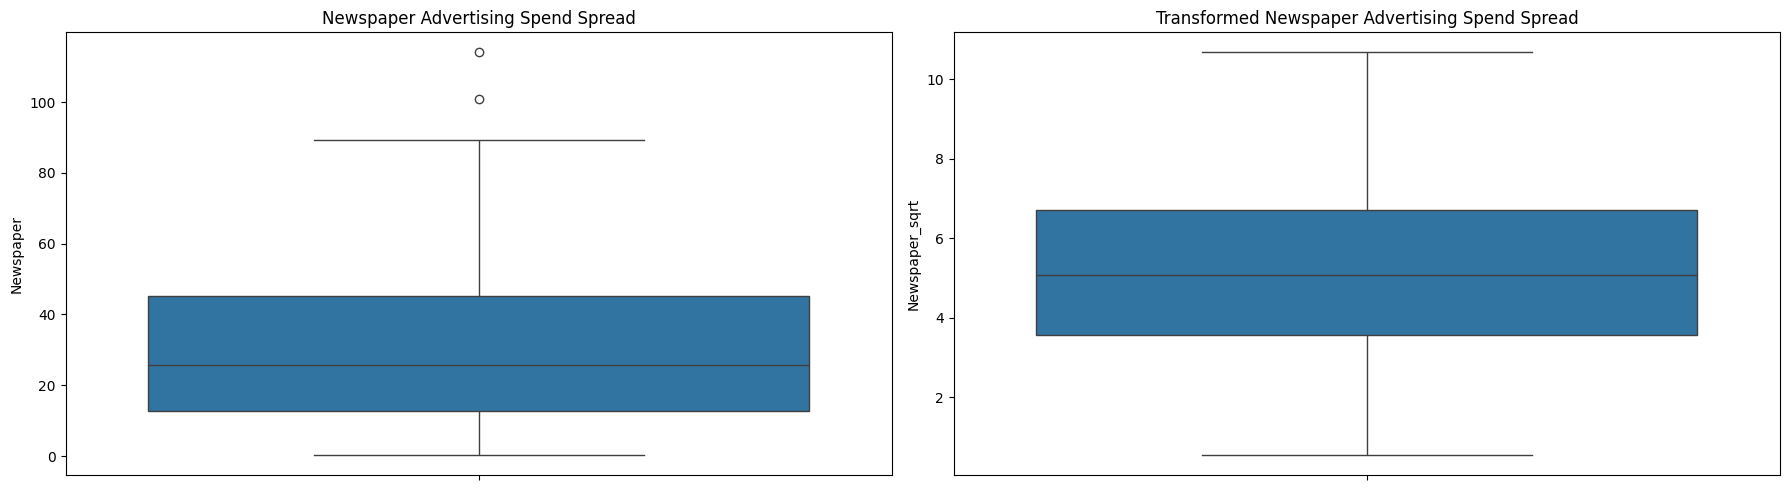

In [11]:
# Create box plots for each variable
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.boxplot(data=df, y='Newspaper', ax=axes[0])
axes[0].set_title('Newspaper Advertising Spend Spread')
sns.boxplot(data=df, y='Newspaper_sqrt', ax=axes[1])
axes[1].set_title('Transformed Newspaper Advertising Spend Spread')
plt.tight_layout()
plt.show()

The square root transformation has successfully reduced the positive skewness in Newspaper data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TV              200 non-null    float64
 1   Radio           200 non-null    float64
 2   Newspaper       200 non-null    float64
 3   Sales           200 non-null    float64
 4   Newspaper_sqrt  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [13]:
new_df = df.drop(['Newspaper'], axis=1)

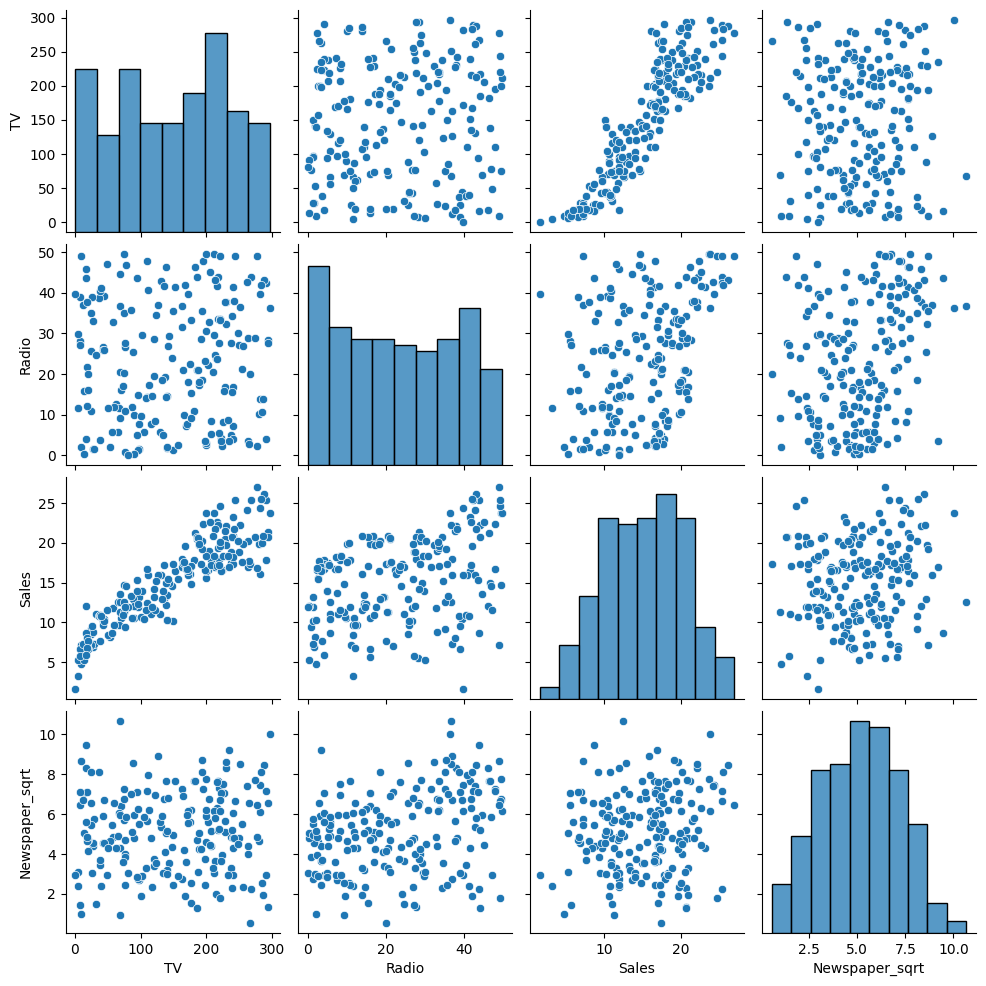

In [14]:
# Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships between variables
sns.pairplot(new_df)
plt.show()

1. TV vs. Sales : This relationship appears to be strongly linear. As TV spending increases, sales tend to increase in a straight-line fashion.

2. Radio vs. Sales: This relationship also shows a positive trend, but it is less strongly linear than the TV vs. Sales relationship. There is more scatter, but a generally linear upward trend is still visible

3. Newspaper vs. Sales: This relationship shows a very weak positive trend. The scatter plot suggests a rather scattered distribution, and it is hard to see a strong linear trend.

4. There is no clear linear or non-linear relationship between TV, Radio and newspaper. The points are scattered randomly.

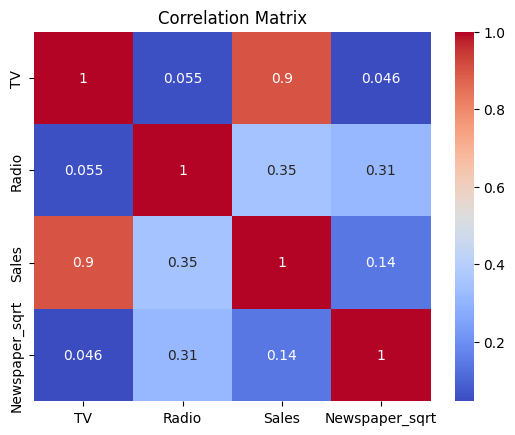

In [15]:
# Correlation heatmap
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. TV is the most influential factor in sales.
2. Radio also contributes to sales but to a lesser extent.
3. Newspaper has the weakest impact on sales.
4. The advertising budgets for TV, Radio, and Newspaper are relatively independent, with some moderate correlation between Radio and Newspaper.
5. There are no strong negative correlations in the matrix, which is a good sign. It means that increasing spending on one platform doesn't negatively impact sales in another.

In [16]:
# Prepare the data for modeling
X = new_df[['TV', 'Radio', 'Newspaper_sqrt']]  # Features
y = new_df['Sales']  # Target variable

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
# Make predictions on the test set for Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Linear Regression R-squared: {r2_linear}')

# Make predictions on the test set for Polynomial Regression
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')

# Make predictions on the test set for Decision Tree Regression
y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree Regression model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression Mean Squared Error: {mse_tree}')
print(f'Decision Tree Regression R-squared: {r2_tree}')

Linear Regression Mean Squared Error: 2.936092132791628
Linear Regression R-squared: 0.9049842195652702
Polynomial Regression Mean Squared Error: 1.5062998641640144
Polynomial Regression R-squared: 0.9512541668690107
Decision Tree Regression Mean Squared Error: 3.4019999999999997
Decision Tree Regression R-squared: 0.8899068317956319


1. Polynomial Regression has the lowest MSE (1.5) and the highest R-squared (0.95).
2. Based on these results, Polynomial Regression is the most suitable model for sales prediction task.

In [23]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Create a pipeline for Polynomial Regression
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],  # Try different polynomial degrees
    'linearregression__fit_intercept': [True, False],  # Try with and without intercept
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    PolynomialRegression(),
    param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=5,  # 5-fold cross-validation
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best Parameters:', best_params)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Best Parameters: {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2}
Mean Squared Error: 1.5062998641646614
R-squared: 0.9512541668689898


1. linearregression__fit_intercept: True: the best Polynomial Regression model for your transformed data includes an intercept term.

2. polynomialfeatures__degree: 2: This means that a quadratic (second-degree) polynomial best fits the relationship between your features and sales.

3. The low MSE and high R-squared indicate that your tuned Polynomial Regression model is an excellent fit for data.

4. The fact that a second-degree polynomial is the best fit suggests that the relationship between advertising spending and sales is likely quadratic (curved).

5. The quadratic relationship suggests that there might be diminishing returns on advertising spending at higher levels. It's important to consider this when allocating your advertising budget.

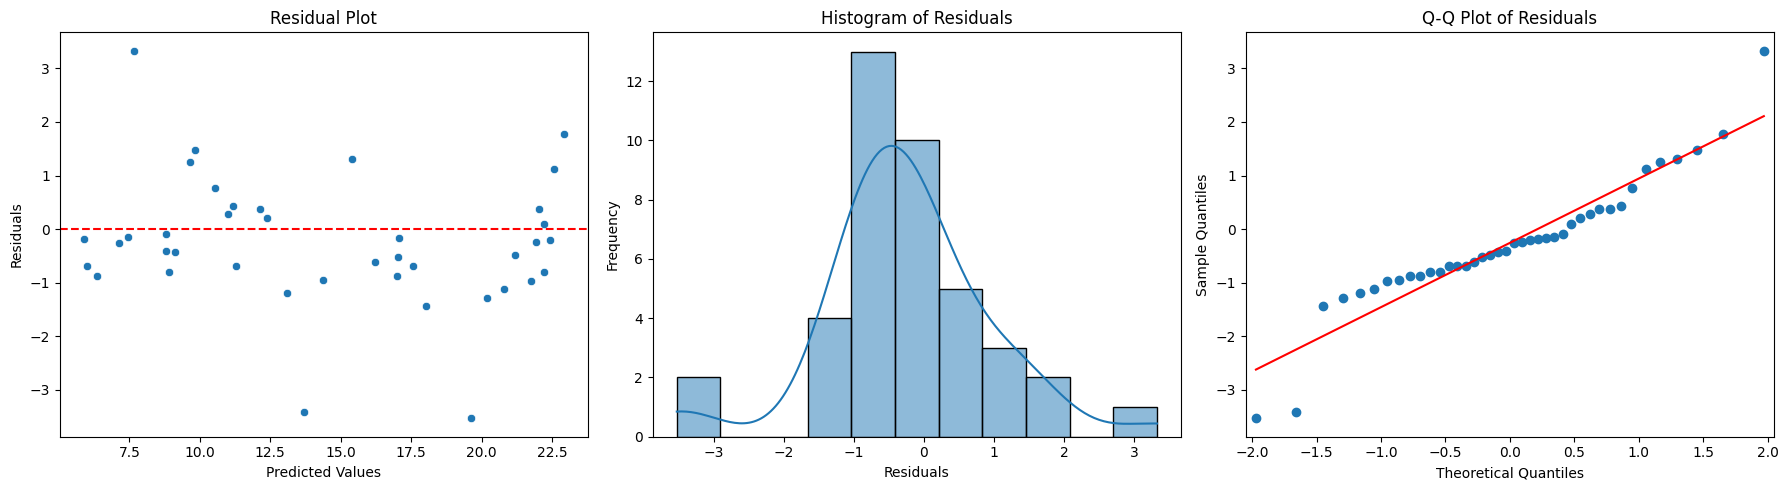

In [26]:
#Residual Analysis
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - y_pred_poly

# Create subplots for residual analysis
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Residual plot
sns.scatterplot(x=y_pred_poly, y=residuals, ax=axs[0])
axs[0].axhline(0, color='r', linestyle='--')
axs[0].set_title('Residual Plot')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Residuals')

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axs[1])
axs[1].set_title('Histogram of Residuals')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

# Q-Q plot of residuals
sm.qqplot(residuals, line='s', ax=axs[2])
axs[2].set_title('Q-Q Plot of Residuals')
axs[2].set_xlabel('Theoretical Quantiles')
axs[2].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

In [ ]:
#try Robust Regression due to outliers

from sklearn.linear_model import HuberRegressor

# Create and train the Huber Regressor model
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_robust = huber_model.predict(X_test)

# Evaluate the Huber Regressor model
mse_robust = mean_squared_error(y_test, y_pred_robust)
r2_robust = r2_score(y_test, y_pred_robust)

print(f'Huber Regressor Mean Squared Error: {mse_robust}')
print(f'Huber Regressor R-squared: {r2_robust}')

Huber Regressor Mean Squared Error: 2.8054837613772707
Huber Regressor R-squared: 0.9092108772381154


While the robust model has a slightly higher error, it might be more stable and less influenced by extreme values. This can be beneficial if concerned about the reliability of the model in the presence of outliers.

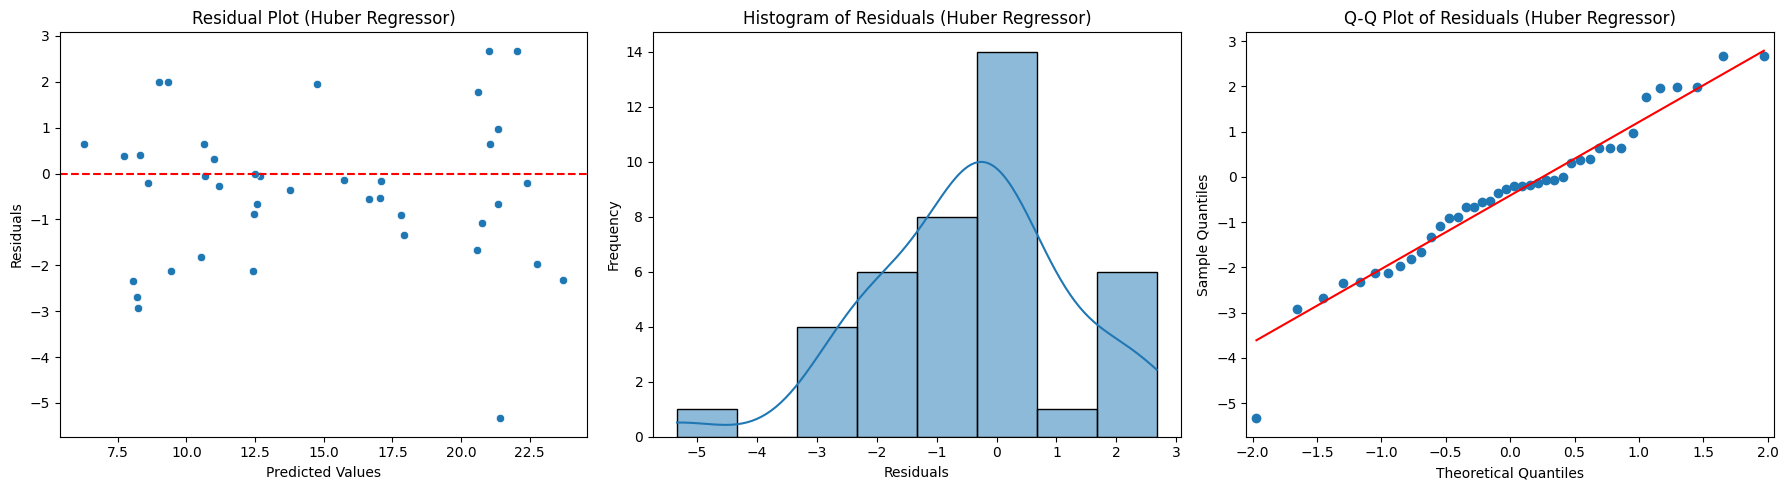

In [28]:
# Calculate residuals for Huber Regressor
residuals_robust = y_test - y_pred_robust

# Create subplots for residual analysis
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Residual plot
sns.scatterplot(x=y_pred_robust, y=residuals_robust, ax=axs[0])
axs[0].axhline(0, color='r', linestyle='--')
axs[0].set_title('Residual Plot (Huber Regressor)')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Residuals')

# Histogram of residuals
sns.histplot(residuals_robust, kde=True, ax=axs[1])
axs[1].set_title('Histogram of Residuals (Huber Regressor)')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

# Q-Q plot of residuals
sm.qqplot(residuals_robust, line='s', ax=axs[2])
axs[2].set_title('Q-Q Plot of Residuals (Huber Regressor)')
axs[2].set_xlabel('Theoretical Quantiles')
axs[2].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

Given the strong linear relationship, the performance metrics informstion, the goal is to make prediction model, the Polynomial Regression model appears to be the best choice in this scenario.

Here's why:

Strong Linear Relationship: there's a strong linear relationship between the variables. Polynomial regression, even with a low-degree polynomial (e.g., degree 2), can effectively capture this linear relationship.
Lowest MSE and Highest R-squared: The Polynomial Regression model has the lowest Mean Squared Error (MSE) and the highest R-squared value among the models you listed. This indicates that it provides the best fit to the data and explains the most variance in the target variable.

Why not the other models?

Linear Regression: While Linear Regression is suitable for linear relationships, it might not capture any subtle non-linearity that could be present in the data. Polynomial Regression offers more flexibility in this regard.
Decision Tree Regression: Decision trees are better suited for non-linear and complex relationships. In this case, with a strong linear relationship, a simpler model like Polynomial Regression is likely to perform better and generalize better to new data.
Huber Regressor: Huber Regression is primarily designed to be robust to outliers. While it performs well, it might not be the best choice when a strong linear relationship is present and outliers are not a major concern bacause the goal is to make prediction.

In [33]:
from sklearn.model_selection import cross_val_score, KFold

# Cross-validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
cv_mse_scores = -cv_scores

# Print cross-validation scores
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean Cross-Validation MSE:", cv_mse_scores.mean())
print("Standard Deviation of Cross-Validation MSE:", cv_mse_scores.std())

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Set Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Cross-Validation MSE Scores: [1.50629986 1.66315291 2.62173525 1.74428075 2.50512289]
Mean Cross-Validation MSE: 2.008118334131885
Standard Deviation of Cross-Validation MSE: 0.461296529042541

Test Set Evaluation:
Mean Squared Error: 1.5062998641646614
R-squared: 0.9512541668689898


1. The cross-validation MSE scores are relatively consistent across the different folds, ranging from 1.51 to 2.62
2. The standard deviation of the cross-validation MSE is 0.46, which is relatively small compared to the mean MSE of 2.01.
3. The test set MSE (1.51) is very close to the mean cross-validation MSE (2.01) and even matches the MSE of the first fold.
4. The high R-squared value (0.95) on the test set also demonstrates that the model explains a large portion of the variance in the target variable on unseen data.
5. Based on the cross-validation and test set results, the model appears to be well-generalized and not overfitting. This is a positive outcome, indicating that the model is likely to perform well on new, unseen data.

In [34]:
# Get the coefficients from the best polynomial regression model
coefficients = best_model.named_steps['linearregression'].coef_

# Get the feature names from the polynomial features
feature_names = poly_features.get_feature_names_out(X.columns)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Display the feature importance
print("Feature Importance (Polynomial Regression):")
print(feature_importance_df)

Feature Importance (Polynomial Regression):
                Feature  Importance
0                     1    4.936414
1                    TV    0.076074
2                 Radio   -0.038494
3        Newspaper_sqrt    0.094723
4                  TV^2   -0.000104
5              TV Radio    0.000413
6     TV Newspaper_sqrt   -0.000202
7               Radio^2    0.001395
8  Radio Newspaper_sqrt    0.003052
9      Newspaper_sqrt^2   -0.009056


TV Dominates: TV is the most important predictor of Sales, both as an individual feature and in interaction with other features.
Complex Relationships: The presence of significant interaction terms indicates that the relationships between the predictors and Sales are not purely linear and involve interplay between different advertising channels.
Newspaper_sqrt's Role: While Newspaper_sqrt has a weak direct relationship with Sales, it plays a role in the model through its interaction effects.

In [35]:
# Display the equation of the model
equation = "Sales = "
for i, row in feature_importance_df.iterrows():
    equation += f"{row['Importance']:.4f} * {row['Feature']} + "
equation += "Intercept"
print("Equation of the Model:")
print(equation)

Equation of the Model:
Sales = 4.9364 * 1 + 0.0761 * TV + -0.0385 * Radio + 0.0947 * Newspaper_sqrt + -0.0001 * TV^2 + 0.0004 * TV Radio + -0.0002 * TV Newspaper_sqrt + 0.0014 * Radio^2 + 0.0031 * Radio Newspaper_sqrt + -0.0091 * Newspaper_sqrt^2 + Intercept


RECOMMENDATION

1. Prioritize TV Advertising:: Allocate a significant portion of your advertising budget to TV, as it has the most substantial impact on sales.
2. Optimize Radio Spending: While Radio is less influential than TV, it still contributes to sales. Optimize your Radio spending to maximize its effectiveness.
3. Re-evaluate Newspaper: Consider whether Newspaper advertising is worth the investment, given its minimal impact on sales.
4. Focus on Interaction Effects: the impact of one channel can depend on the spending levels of other channels.
4. Monitor and Adapt: Continuously monitor your model's performance and adapt your advertising strategy as needed. The relationships between advertising and sales might change over time.

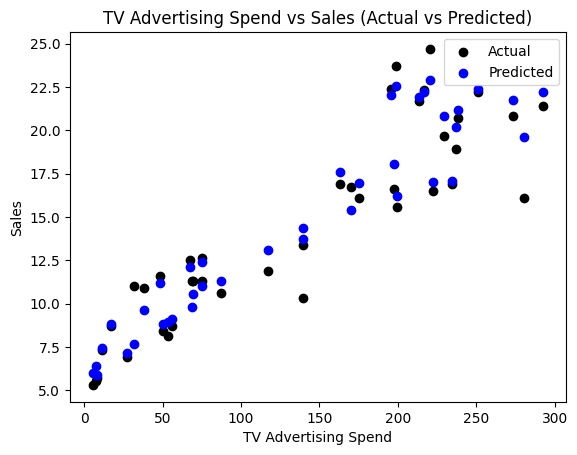

In [38]:
# Visualize the predictions vs actual values (for TV feature)
plt.scatter(X_test['TV'], y_test, color='black', label='Actual')
plt.scatter(X_test['TV'], y_pred, color='blue', label='Predicted')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('TV Advertising Spend vs Sales (Actual vs Predicted)')
plt.legend()
plt.show()

The plot clearly shows a positive correlation between TV Advertising Spend and Sales. The predicted sales values (blue dots) follow the trend of the actual sales values (black dots) quite closely. This visually confirms the strong performance of the model, as indicated by the high R-squared value.

In [36]:
# Example Prediction Input (Corrected)
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper_sqrt': [np.sqrt(25)]})
predicted_sales = best_model.predict(new_data)
print(f'Predicted Sales for new data: {predicted_sales[0]}')

Predicted Sales for new data: 16.047920378034075


Based on your model's understanding of the relationship between advertising and sales, it predicts that if you spend $100 million on TV advertising, $50 million on Radio advertising, and $25 million on Newspaper advertising, you can expect to achieve sales of approximately $16.05 million.